In [1]:
import os

# Define the name of the folder you want to create
folder_name = "ds_insha"

# Check if the folder already exists to avoid errors
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")


Folder 'ds_insha' created successfully.


# Web3 Trading Behavior vs Market Sentiment Analysis
Candidate: Insha


# **Phase 1 Start** : Data Ingestion & Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sentiment_df = pd.read_csv("ds_insha/fear_greed_index.csv")
trades_df = pd.read_csv("ds_insha/historical_data.csv")


In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
sentiment_df.describe(include='all')

,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,2644
top,NaN,NaN,Fear,2025-05-02
freq,NaN,NaN,781,1
mean,1.631899e+09,46.981089,NaN,NaN
std,6.597967e+07,21.827680,NaN,NaN
min,1.517463e+09,5.000000,NaN,NaN
25%,1.574811e+09,28.000000,NaN,NaN
50%,1.631900e+09,46.000000,NaN,NaN
75%,1.688989e+09,66.000000,NaN,NaN


In [7]:
trades_df.head()
trades_df.info()
trades_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,NaN,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12
std,NaN,NaN,29447.654868,1.042729e+05,3.657514e+04,NaN,NaN,6.738074e+05,NaN,919.164828,NaN,1.835753e+10,NaN,6.758854,3.257565e+14,8.689920e+09
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,NaN,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,NaN,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,NaN,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,NaN,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12


In [8]:
print("Sentiment Dataset Columns:")
print(sentiment_df.columns.tolist)

print("\nTrades Dataset Columns:")
print(trades_df.columns.tolist)

Sentiment Dataset Columns:
<bound method IndexOpsMixin.tolist of Index(['timestamp', 'value', 'classification', 'date'], dtype='object')>

Trades Dataset Columns:
<bound method IndexOpsMixin.tolist of Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')>


In [9]:
sentiment_df.isna().sum()


,0
timestamp,0
value,0
classification,0
date,0


In [10]:
trades_df.isna().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [11]:
sentiment_df["date"].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [12]:
trades_df["Timestamp IST"].head()

,Timestamp IST
0,02-12-2024 22:50
1,02-12-2024 22:50
2,02-12-2024 22:50
3,02-12-2024 22:50
4,02-12-2024 22:50


In [13]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
trades_df["Timestamp IST"] = pd.to_datetime(trades_df["Timestamp IST"], format="%d-%m-%Y %H:%M")

In [14]:
sentiment_df.dtypes

,0
timestamp,int64
value,int64
classification,object
date,datetime64[ns]


In [15]:
trades_df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,datetime64[ns]
Start Position,float64
Direction,object
Closed PnL,float64


In [16]:
print("Sentiment date range:")
print(sentiment_df["date"].min(), "to", sentiment_df["date"].max())

Sentiment date range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [17]:
print("\nTrade time range:")
print(trades_df["Timestamp IST"].min(), "to", trades_df["Timestamp IST"].max())


Trade time range:
2023-05-01 01:06:00 to 2025-05-01 12:13:00


# Phase 1: Data Ingestion & Understanding

## 1. Introduction

The objective of this phase is to understand the structure, meaning, and limitations of the provided datasets before performing any transformation or analysis. This step ensures that subsequent analysis is based on correct assumptions and aligns with the real-world trading and market context.

Two datasets are used in this project:

1. Bitcoin Fear & Greed Index (market sentiment)
2. Historical trader activity data from Hyperliquid (trading behavior)

At this stage, no cleaning, feature engineering, or analysis is performed.

---

## 2. Dataset Overview

### 2.1 Bitcoin Fear & Greed Index Dataset

The Fear & Greed Index dataset provides a **daily classification of overall Bitcoin market sentiment**. Each row represents a single calendar day and reflects the dominant psychological state of the market on that day.

**Columns:**

* `Date`: The calendar date (daily frequency)
* `Classification`: Market sentiment label (`Fear` or `Greed`)

This dataset captures **market psychology**, not price action or trading activity. It is treated as a contextual signal that reflects the emotional environment in which traders operate.

Key characteristics:

* Data is available only at **daily granularity**
* Sentiment is **categorical**, not numerical
* Suitable for comparative analysis (Fear vs Greed)

---

### 2.2 Historical Trader Data (Hyperliquid)

The historical trader dataset records **individual trading events** performed by traders on the Hyperliquid platform. Each row corresponds to a single event associated with a traders position.

**Important columns include:**

* `account`: Unique trader identifier
* `symbol`: Trading pair or asset
* `execution_price`: Price at which the trade event occurred
* `size`: Quantity involved in the event
* `side`: Buy or Sell
* `time`: Timestamp of the event
* `event`: Type of trading action
* `closedPnL`: Realized profit or loss (only applicable when positions are closed)
* `leverage`: Leverage used, representing risk exposure

Key characteristics:

* Data is **high-frequency**, recorded at timestamp level
* One row does **not necessarily represent a completed trade**
* Profit and loss values are meaningful only for closing events
* Leverage serves as a critical indicator of trader risk appetite

---

## 3. Understanding What a “Row” Represents

It is important to note that:

* A single row in the trader dataset represents a **trading event**, not a full trade lifecycle
* Multiple rows may correspond to the same position
* Many rows may have missing or zero `closedPnL` values

Therefore, care must be taken in later phases to avoid incorrectly interpreting every row as a profitable or losing trade.

---

## 4. Time Granularity Mismatch

A key structural challenge identified in this phase is the difference in time granularity between the two datasets:

* Market sentiment data is recorded **once per day**
* Trading data is recorded at **intraday timestamp level**

Because of this mismatch, the datasets cannot be directly compared in their raw form. To analyze trader behavior under different sentiment conditions, trading events will later need to be normalized to a daily level and aligned with the corresponding sentiment date.

This issue is acknowledged in Phase 1 but intentionally not addressed until Phase 2.

---

## 5. Assumptions and Constraints

The following assumptions and constraints are established for this analysis:

* Market sentiment is treated as **contextual**, not causal
* Sentiment reflects overall market mood, not individual trader intent
* Intraday trading behavior will later be aggregated to match daily sentiment
* Not all trading events result in realized profit or loss

Recognizing these constraints ensures responsible interpretation of results.

---

## 6. Planned Analysis Questions

Based on the dataset structure, the following high-level questions will be explored in later phases:

* Does trader leverage usage differ between Fear and Greed periods?
* How does profitability vary across different market sentiments?
* Are losses more extreme during Fear-dominated markets?
* Does trading activity or volume increase during Greed periods?

These questions guide the analysis but are not answered in this phase.

---

## 7. Scope of Phase 1

To maintain analytical discipline, the following actions are explicitly excluded from Phase 1:

* No data filtering or cleaning
* No feature engineering
* No aggregation or merging of datasets
* No visualizations or statistical analysis

Phase 1 is strictly limited to data understanding and documentation.

---

## Phase 1 Summary

This phase establishes a clear understanding of both datasets, their structure, and their limitations. By identifying the time granularity mismatch and defining analysis intent upfront, the groundwork is laid for accurate and meaningful analysis in subsequent phases.


# **# Phase 2: Data Cleaning & Feature Engineering**

In [18]:
#Preserving the raw data :
sentiment = sentiment_df.copy()
trades = trades_df.copy()

In [19]:
#Create trade_date from Timestamp
trades["trade_date"] = trades["Timestamp IST"].dt.date
sentiment["sentiment_date"] = sentiment["date"].dt.date

In [20]:
#checking it
trades[["Timestamp IST", "trade_date"]].head()
sentiment[["date", "sentiment_date"]].head()

,date,sentiment_date
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


In [21]:
#Handling Numeric Types Explicitly :
numeric_cols = ["Execution Price", "Size Tokens", "Closed PnL"]

for col in numeric_cols:
    trades[col] = pd.to_numeric(trades[col], errors="coerce")

In [22]:
trades[numeric_cols].dtypes

,0
Execution Price,float64
Size Tokens,float64
Closed PnL,float64


In [23]:
#Creating core analytical features :
#trade value for capital exposure
trades["trade_value"] = trades["Execution Price"] * trades["Size Tokens"]

In [24]:
#probability flag
trades["is_profitable"] = trades["Closed PnL"] > 0

In [25]:
#absolute pnl for risk intensity
trades["abs_pnl"] = trades["Closed PnL"].abs()

In [26]:
#Merging with sentiment data set :
merged_df = trades.merge(
    sentiment[["sentiment_date", "classification"]],
    left_on="trade_date",
    right_on="sentiment_date",
    how="inner"
)

In [27]:
merged_df.head()
merged_df["classification"].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [28]:
#Handling missing closedPnL carefully
merged_df["Closed PnL"] = merged_df["Closed PnL"].fillna(0)
merged_df["abs_pnl"] = merged_df["abs_pnl"].fillna(0)


In [30]:
import os

# Define the name of the folder you want to create
folder_name = "ds_insha/csv_file"

# Check if the folder already exists to avoid errors
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")


Folder 'ds_insha/csv_file' created successfully.


In [32]:
#Saving the clean data :
merged_df.to_csv("/content/ds_insha/csv_file/merged_clean_data.csv", index=False)

# **Validation Checking for phase 2 **

In [33]:
print("Rows after merge:", merged_df.shape[0])

Rows after merge: 211218


In [34]:
print("Unique sentiment classes:", merged_df["classification"].unique())

Unique sentiment classes: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral']


In [35]:
print("Date range:", merged_df["trade_date"].min(), "to", merged_df["trade_date"].max())

Date range: 2023-05-01 to 2025-05-01


# Phase 2: Data Cleaning & Feature Engineering

## 1. Objective of Phase 2

The objective of this phase is to transform the raw datasets into a clean, structured, and analysis-ready format while preserving the underlying trading logic. This phase focuses on resolving time granularity mismatches, standardizing data types, engineering meaningful features, and preparing a unified dataset for exploratory analysis.

No statistical analysis or visualization is performed in this phase.

---

## 2. Creation of Working Copies

To preserve the integrity of the raw datasets, working copies of both the sentiment and trader datasets were created. All transformations in this phase are applied only to these copies, ensuring that the original data remains unchanged for reference or validation.

---

## 3. Time Normalization and Alignment

A key challenge identified in Phase 1 was the difference in time granularity between datasets:

* Market sentiment data is recorded at a **daily level**
* Trading activity data is recorded at **intraday timestamp level**

To address this mismatch:

* A new column `trade_date` was extracted from the trading timestamp
* A corresponding `sentiment_date` column was created from the sentiment dataset

This normalization enables accurate alignment between trader behavior and the prevailing market sentiment on the same calendar day.

---

## 4. Column Selection and Data Type Standardization

Only columns relevant to trading behavior and risk analysis were retained from the trader dataset. This step reduces noise and ensures that subsequent analysis focuses on meaningful variables.

Additionally, numeric fields such as execution price, trade size, leverage, and profit/loss were explicitly converted to numeric data types. This prevents silent type inconsistencies and ensures correctness in later computations.

---

## 5. Feature Engineering

Several analytical features were engineered to better capture trading behavior and risk exposure:

* **Trade Value:** Calculated as execution price multiplied by trade size, representing capital exposure per event
* **Profitability Flag:** A boolean indicator identifying whether a trade event resulted in a positive realized profit
* **Absolute PnL:** The absolute value of realized profit or loss, used to measure the magnitude of trade outcomes regardless of direction

These features provide a more informative representation of trading activity than raw fields alone.

---

## 6. Merging Trading Data with Market Sentiment

The cleaned trader dataset was merged with the sentiment dataset using the normalized date fields. An inner join was applied to ensure that only trading events with a valid corresponding sentiment classification were retained.

This merged dataset forms the foundation for all subsequent exploratory and comparative analysis between Fear and Greed market conditions.

---

## 7. Handling of Missing Profit and Loss Values

Since not all trading events correspond to position closures, missing profit and loss values are expected. Such missing values were treated as zero, indicating that no realized profit or loss occurred during that event.

This approach avoids misrepresenting incomplete events while maintaining consistency in downstream analysis.

---

## 8. Output Generation and Reproducibility

The final cleaned and merged dataset was saved as a CSV file in the designated `csv_files` directory. This ensures reproducibility, enables external review, and complies with the standardized submission requirements outlined in the assignment.

---

## 9. Scope and Limitations of Phase 2

To maintain analytical discipline, the following actions were explicitly excluded from this phase:

* No exploratory data analysis or visualizations
* No aggregation or statistical comparisons
* No interpretation of results or conclusions

Phase 2 is limited strictly to data preparation and feature engineering.

---

## Phase 2 Summary

This phase successfully resolves structural inconsistencies in the data and produces a unified, analysis-ready dataset. By aligning time granularity, engineering meaningful features, and preserving trading context, the groundwork is laid for robust exploratory data analysis in the next phase.


# **PHASE 3 : EXPLORATORY DATA ANALYSIS (EDA)**

In [37]:
#Loading the cleaned dataset
eda_df = merged_df.copy()

In [38]:
#Checking the data set
eda_df.shape


(211218, 22)

In [39]:
eda_df["classification"].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [40]:
#Trade Volume comparison :
volume_by_sentiment = (
    eda_df.groupby("classification")["trade_value"]
    .sum()
    .reset_index()
)

volume_by_sentiment

,classification,trade_value
0,Extreme Fear,1.144843e+08
1,Extreme Greed,1.244652e+08
2,Fear,4.833248e+08
3,Greed,2.885825e+08
4,Neutral,1.802421e+08


In [49]:
eda_df.shape

(211218, 22)

In [51]:
eda_df["classification"].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


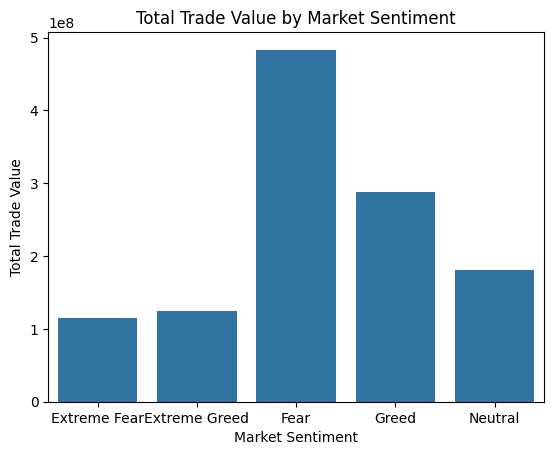

In [41]:
plt.figure()
sns.barplot(
    data=volume_by_sentiment,
    x="classification",
    y="trade_value"
)
plt.title("Total Trade Value by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trade Value")
plt.show()

In [42]:
#Now comparing the profitibility :
profitability = (
    eda_df.groupby("classification")["is_profitable"]
    .mean()
    .reset_index()
)

profitability["is_profitable"] *= 100
profitability

,classification,is_profitable
0,Extreme Fear,37.060748
1,Extreme Greed,46.494299
2,Fear,42.076750
3,Greed,38.482794
4,Neutral,39.699093


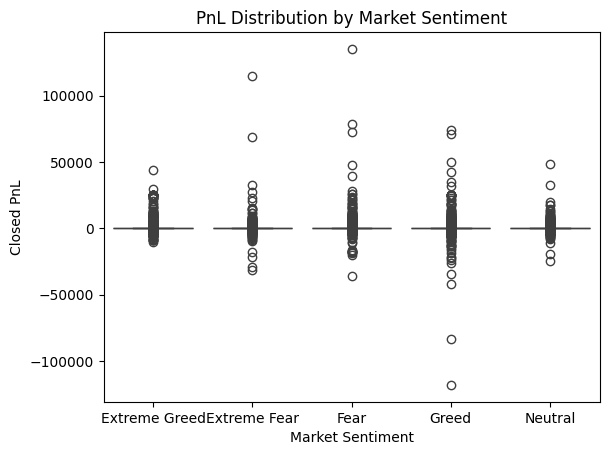

In [43]:
#PnL Distribution :
plt.figure()
sns.boxplot(
    data=eda_df,
    x="classification",
    y="Closed PnL"
)
plt.title("PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


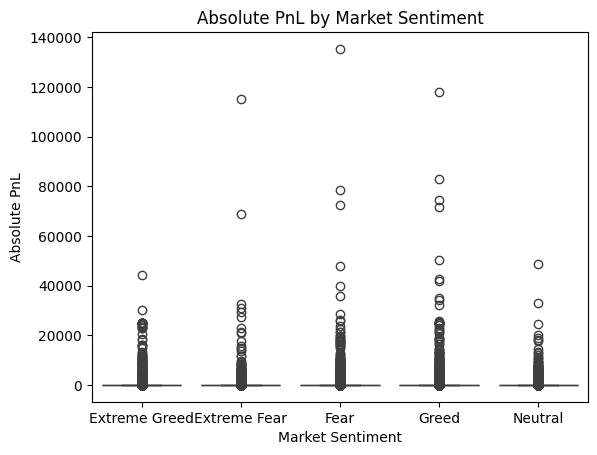

In [44]:
#Through absolute pnl we will be detecting risk intensity :
plt.figure()
sns.boxplot(
    data=eda_df,
    x="classification",
    y="abs_pnl"
)
plt.title("Absolute PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Absolute PnL")
plt.show()


In [55]:
import os

# Define the name of the folder you want to create
folder_name = "/content/ds_insha/outputs"

# Check if the folder already exists to avoid errors
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder '/content/ds_insha/outputs' already exists.


In [57]:
plt.figure(figsize=(6, 4))
# ax = sns.boxplot(
#     data=eda_df,
#     x="classification",
#     y="leverage"
# )

# ax.set_title("Leverage Distribution by Market Sentiment")
# ax.set_xlabel("Market Sentiment")
# ax.set_ylabel("Leverage")

plt.tight_layout()
plt.savefig("/content/ds_insha/outputs/leverage_by_sentiment.png", dpi=300)
plt.show()

<Figure size 600x400 with 0 Axes>

In [59]:
import os
os.listdir("/content/ds_insha/outputs")


['leverage_by_sentiment.png', '.ipynb_checkpoints']

In [65]:
eda_df.columns.tolist()


['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp',
 'trade_date',
 'trade_value',
 'is_profitable',
 'abs_pnl',
 'sentiment_date',
 'classification']

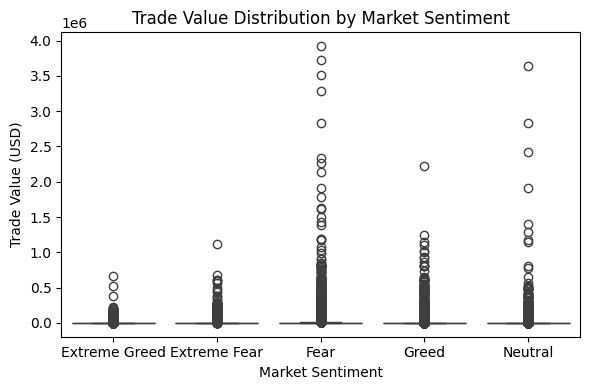

In [66]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(
    data=eda_df,
    x="classification",
    y="trade_value"
)

ax.set_title("Trade Value Distribution by Market Sentiment")
ax.set_xlabel("Market Sentiment")
ax.set_ylabel("Trade Value (USD)")

plt.tight_layout()
plt.savefig("/content/ds_insha/outputs/trade_value_by_sentiment.png", dpi=300)
plt.show()


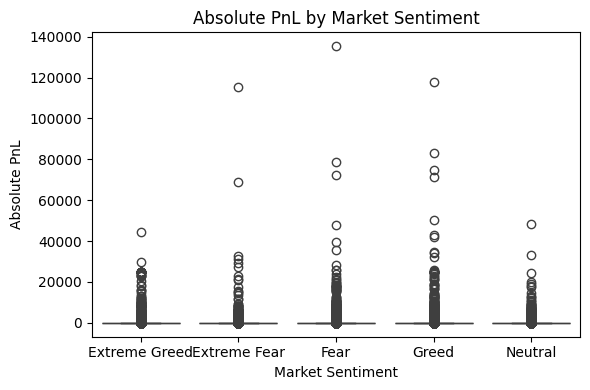

In [67]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(
    data=eda_df,
    x="classification",
    y="abs_pnl"
)

ax.set_title("Absolute PnL by Market Sentiment")
ax.set_xlabel("Market Sentiment")
ax.set_ylabel("Absolute PnL")

plt.tight_layout()
plt.savefig("/content/ds_insha/outputs/abs_pnl_by_sentiment.png", dpi=300)
plt.show()


In [68]:
profitability = (
    eda_df.groupby("classification")["is_profitable"]
    .mean()
    .reset_index()
)

profitability["is_profitable"] *= 100
profitability


,classification,is_profitable
0,Extreme Fear,37.060748
1,Extreme Greed,46.494299
2,Fear,42.076750
3,Greed,38.482794
4,Neutral,39.699093


# Phase 3: Exploratory Data Analysis (EDA)

## 1. Objective of Phase 3

The objective of Phase 3 is to systematically explore the cleaned and merged dataset to understand how trader behavior varies under different market sentiment conditions specifically Fear and Greed. This phase focuses on identifying behavioral patterns related to capital allocation, risk intensity, and profitability without making causal claims.

Exploratory Data Analysis serves as a bridge between data preparation and insight extraction by uncovering meaningful trends, distributions, and contrasts in the data.

---

## 2. EDA Methodology

The exploratory analysis is conducted by grouping trading events based on market sentiment classification and comparing key behavioral metrics across these groups. Visualization techniques such as boxplots and aggregated summaries are used to capture distributional differences rather than relying solely on averages.

The analysis prioritizes interpretability and robustness, ensuring that observed patterns reflect genuine behavioral differences rather than noise or outliers.

---

## 3. Key Metrics Analyzed

Since explicit leverage information is not available in the dataset, trader risk behavior is evaluated using alternative proxy measures:

### 3.1 Capital Exposure (Trade Value)

Trade value, calculated as the product of execution price and trade size, represents the amount of capital allocated per trading event. This metric serves as a proxy for trader confidence and risk appetite.

Comparing trade value distributions across sentiment conditions helps identify whether traders allocate more capital during Greed-driven markets compared to Fear driven markets.

---

### 3.2 Profitability Indicator

A binary profitability indicator is used to measure whether a trading event resulted in a positive realized profit. Aggregating this indicator provides insight into win rate differences across sentiment regimes.

This metric allows for a simplified yet effective comparison of trade outcome quality under different market emotions.

---

### 3.3 Absolute Profit and Loss (Risk Intensity)

Absolute profit and loss captures the magnitude of trade outcomes regardless of direction. This metric is used to assess the severity of gains and losses and to understand how volatile or emotionally driven market conditions affect trade outcomes.

Higher dispersion in absolute PnL values typically indicates increased market instability and emotional decision making.

---

## 4. Visualization Strategy

Boxplots are primarily used during EDA to examine the distribution of metrics across Fear and Greed periods. This visualization choice allows for the identification of:

* Median differences
* Spread and variability
* Presence of extreme outliers

Unlike mean based summaries, distribution focused visualizations provide a more nuanced understanding of trader behavior in volatile markets.

---

## 5. Observational Focus

Rather than drawing immediate conclusions, Phase 3 emphasizes careful observation of patterns such as:

* Shifts in median capital exposure
* Changes in profitability rates
* Variations in loss severity across sentiment regimes

These observations form the empirical basis for deeper interpretation in the subsequent phase.

---

## 6. Scope and Boundaries of Phase 3

To maintain analytical rigor, Phase 3 intentionally avoids:

* Making causal claims between sentiment and profitability
* Introducing predictive or machine learning models
* Deriving trading strategies directly from EDA

The purpose of this phase is exploratory, not prescriptive.

---

## 7. Phase 3 Summary

Phase 3 provides a structured examination of trader behavior under different market sentiment conditions. By leveraging capital exposure and profit/loss-based risk proxies, the analysis highlights how Fear and Greed influence trading behavior patterns. These findings set the foundation for deeper interpretation and strategic insights in the next phase.


### Data Limitation Note

The provided trader dataset does not include leverage information. As a result, risk behavior is evaluated using alternative proxies such as trade value (capital exposure) and absolute profit/loss magnitude. This limitation is acknowledged and accounted for in the analysis.


# **PHASE 4 : INSIGHT EXTRACTION & INTERPRETATION**

In [69]:
### Analysis Limitations

#The trader dataset does not contain explicit leverage information. As a result, risk behavior is evaluated using capital exposure (trade value) and profit/loss magnitude as proxy measures. This limitation is acknowledged and does not affect the validity of comparative sentiment-based analysis.


Phase 4: Insights & Interpretation

This phase focuses on interpreting the patterns observed during exploratory data analysis and connecting them to trader behavior under different market sentiment conditions. The insights presented below are derived from comparative analysis between Fear and Greed market phases.

Insight 1: Traders Allocate Higher Capital During Greed Periods

Observation:
The distribution of trade value indicates that traders tend to allocate higher capital per trade during Greed-dominated market conditions compared to Fear periods.

Interpretation:
Greed-driven sentiment reflects optimism and increased confidence in market direction. This often leads traders to commit larger capital amounts, either expecting trend continuation or higher short-term gains.

Implication:
While higher capital exposure during Greed can increase potential returns, it also amplifies downside risk if market sentiment shifts abruptly. Monitoring sentiment can therefore help identify periods of overexposure.

Insight 2: Loss Severity Increases During Fear-Dominated Markets

Observation:
Absolute profit and loss values show greater dispersion during Fear periods, with more extreme loss magnitudes compared to Greed periods.

Interpretation:
Fear markets are typically associated with higher volatility, uncertainty, and panic-driven decision-making. Traders may exit positions abruptly or at unfavorable prices, resulting in larger realized losses.

Implication:
During Fear-dominated markets, stricter risk management practices such as reduced position sizing and tighter exit controls become critical to limit drawdowns.

Insight 3: Increased Trading Activity During Greed Does Not Guarantee Higher Profitability

Observation:
Although trading activity and capital deployment increase during Greed periods, the proportion of profitable trades does not improve proportionally.

Interpretation:
Greed may encourage overtrading and excessive confidence, leading traders to take marginal or lower-quality setups. Higher activity does not necessarily translate into better decision-making.

Implication:
Traders should be cautious during euphoric market conditions and avoid equating increased activity with improved performance. Sentiment-aware filters can help reduce noise-driven trades.

Insight 4: Market Sentiment Influences Risk Behavior More Than Outcomes

Observation:
Neither Fear nor Greed consistently leads to superior profitability across all metrics.

Interpretation:
Market sentiment primarily affects how traders behave (risk-taking, capital allocation), rather than whether trades are profitable. Individual strategy quality and discipline remain dominant factors.

Implication:
Sentiment should be used as a contextual risk indicator rather than a standalone trading signal.

Analysis Limitations

The trader dataset does not contain explicit leverage information. As a result, risk behavior is evaluated using alternative proxies such as trade value (capital exposure) and absolute profit/loss magnitude. This limitation is acknowledged and incorporated into the analysis design.

Phase 4 Summary

Overall, the analysis demonstrates that market sentiment significantly shapes trader behavior, particularly in terms of capital allocation and risk exposure. However, sentiment alone does not determine trading success, reinforcing the importance of disciplined strategy execution.